## Kaggle 4 - Straightforward approach (only a few visuals) 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:/Users/jharbour/Desktop/Train_Churn_binary Kaggle.csv')
test = pd.read_csv("C:/Users/jharbour/Desktop/Test_Churn KAggle.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   object 
 1   SeniorCitizen     5282 non-null   int64  
 2   Partner           5282 non-null   object 
 3   Dependents        5282 non-null   object 
 4   tenure            5282 non-null   int64  
 5   PhoneService      5282 non-null   object 
 6   MultipleLines     5282 non-null   object 
 7   InternetService   5282 non-null   object 
 8   OnlineSecurity    5282 non-null   object 
 9   OnlineBackup      5282 non-null   object 
 10  DeviceProtection  5282 non-null   object 
 11  TechSupport       5282 non-null   object 
 12  StreamingTV       5282 non-null   object 
 13  StreamingMovies   5282 non-null   object 
 14  Contract          5282 non-null   object 
 15  PaperlessBilling  5282 non-null   object 
 16  PaymentMethod     5282 non-null   object 


In [3]:
train.shape,test.shape 

((5282, 20), (1761, 20))

In [4]:
# Converting "No internet service" to "No" for the columns listed below
cols = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'OnlineSecurity']

for i in cols:
    train[i] = train[i].replace({"No internet service": "No"})

In [5]:
# Converting "No phone service" to "No" for the columns listed below
train.MultipleLines = train.MultipleLines.replace({'No phone service':"No"})

In [6]:
#Addressing numeric features
train.TotalCharges = pd.to_numeric(train.TotalCharges, errors = 'coerce')

train.TotalCharges.fillna(train['TotalCharges'].mean(),inplace=True)

train.TotalCharges.isnull().sum()

0

In [7]:
#Idea: Use the average monthly charge most common services, to create new features
round(train.MonthlyCharges.mean(),2)

64.5

In [8]:
train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,Yes,40,No,No,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.85,2036.55,0
1,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,81.30,416.30,1


In [9]:
train.shape

(5282, 20)

In [10]:
month = (train['Contract'] == 'Month-to-month')  & (train.Churn == 1) 
train[month]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,81.30,416.30,1
8,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,80.50,80.50,1
10,Female,1,No,No,37,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,2841.55,1
12,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.35,89.50,1
13,Female,1,Yes,No,28,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),101.30,2812.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,1
5261,Male,0,No,No,5,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,49.20,216.90,1
5265,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.45,5124.60,1
5270,Female,0,No,No,1,No,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,35.75,35.75,1


In [11]:
len(train[month])

1239

In [12]:
(len(train[month])/5282)*100 # the number of churned customers with month-to-month 

23.457023854600532

In [13]:
# Creating variables and percents representing the percentage of customers leaving. 

percents = train['Churn'].value_counts(normalize = True ).mul(100).round(2)
#perc_churned = churn_df[churn_df.Churn == "1"].shape[0]
percents

0    73.61
1    26.39
Name: Churn, dtype: float64

In [10]:
# The churn column seems to be standardized since all the descriptive stats are between 0 & 1.
# Now let's look at how many customers are/are not churnning by getting a churn count.

counts = train['Churn'].value_counts()


df = pd.DataFrame({'counts': counts, '%':percents})
retained = df['%'][0]  
print(retained,'% of customers stayed with the company')

churned = df['%'][1]
print(churned,'% of customers left with the company')

73.61 % of customers stayed with the company
26.39 % of customers left with the company


### The majority of churn comes from the month-to-month subgroup of customers.  Let's look at their average monthly charges and total charges... maybe we can additionally guage if any delenquincy is present. 

## Data Visualizations to consider

In [4]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
train.Contract

0       Month-to-month
1       Month-to-month
2             One year
3       Month-to-month
4       Month-to-month
             ...      
5277    Month-to-month
5278    Month-to-month
5279          Two year
5280          Two year
5281    Month-to-month
Name: Contract, Length: 5282, dtype: object

In [6]:
train.InternetService

0               DSL
1       Fiber optic
2               DSL
3               DSL
4       Fiber optic
           ...     
5277            DSL
5278    Fiber optic
5279             No
5280            DSL
5281    Fiber optic
Name: InternetService, Length: 5282, dtype: object

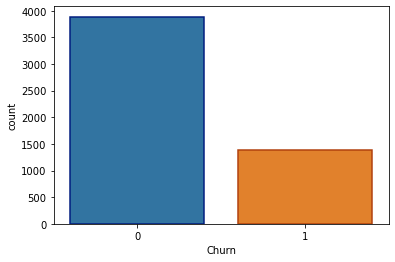

In [19]:
# Visual of customer churn 
sns.countplot(train['Churn'], edgecolor = sns.color_palette("dark", 2), linewidth = 1.5)

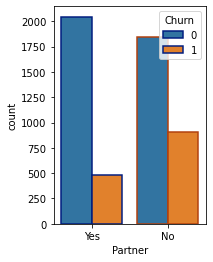

In [20]:
# plot the sub categories of the train data

plt.subplot(1,2,1)
sns.countplot('Partner', hue = 'Churn', data = train, edgecolor = sns.color_palette("dark", 2), linewidth = 1.5)

In [12]:
cat_feats = ['gender', 'Partner', 'Dependents', 'TechSupport',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'StreamingTV','DeviceProtection','SeniorCitizen',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [13]:
list(enumerate(cat_feats))

[(0, 'gender'),
 (1, 'Partner'),
 (2, 'Dependents'),
 (3, 'TechSupport'),
 (4, 'PhoneService'),
 (5, 'MultipleLines'),
 (6, 'InternetService'),
 (7, 'OnlineSecurity'),
 (8, 'OnlineBackup'),
 (9, 'StreamingTV'),
 (10, 'DeviceProtection'),
 (11, 'SeniorCitizen'),
 (12, 'StreamingMovies'),
 (13, 'Contract'),
 (14, 'PaperlessBilling'),
 (15, 'PaymentMethod')]

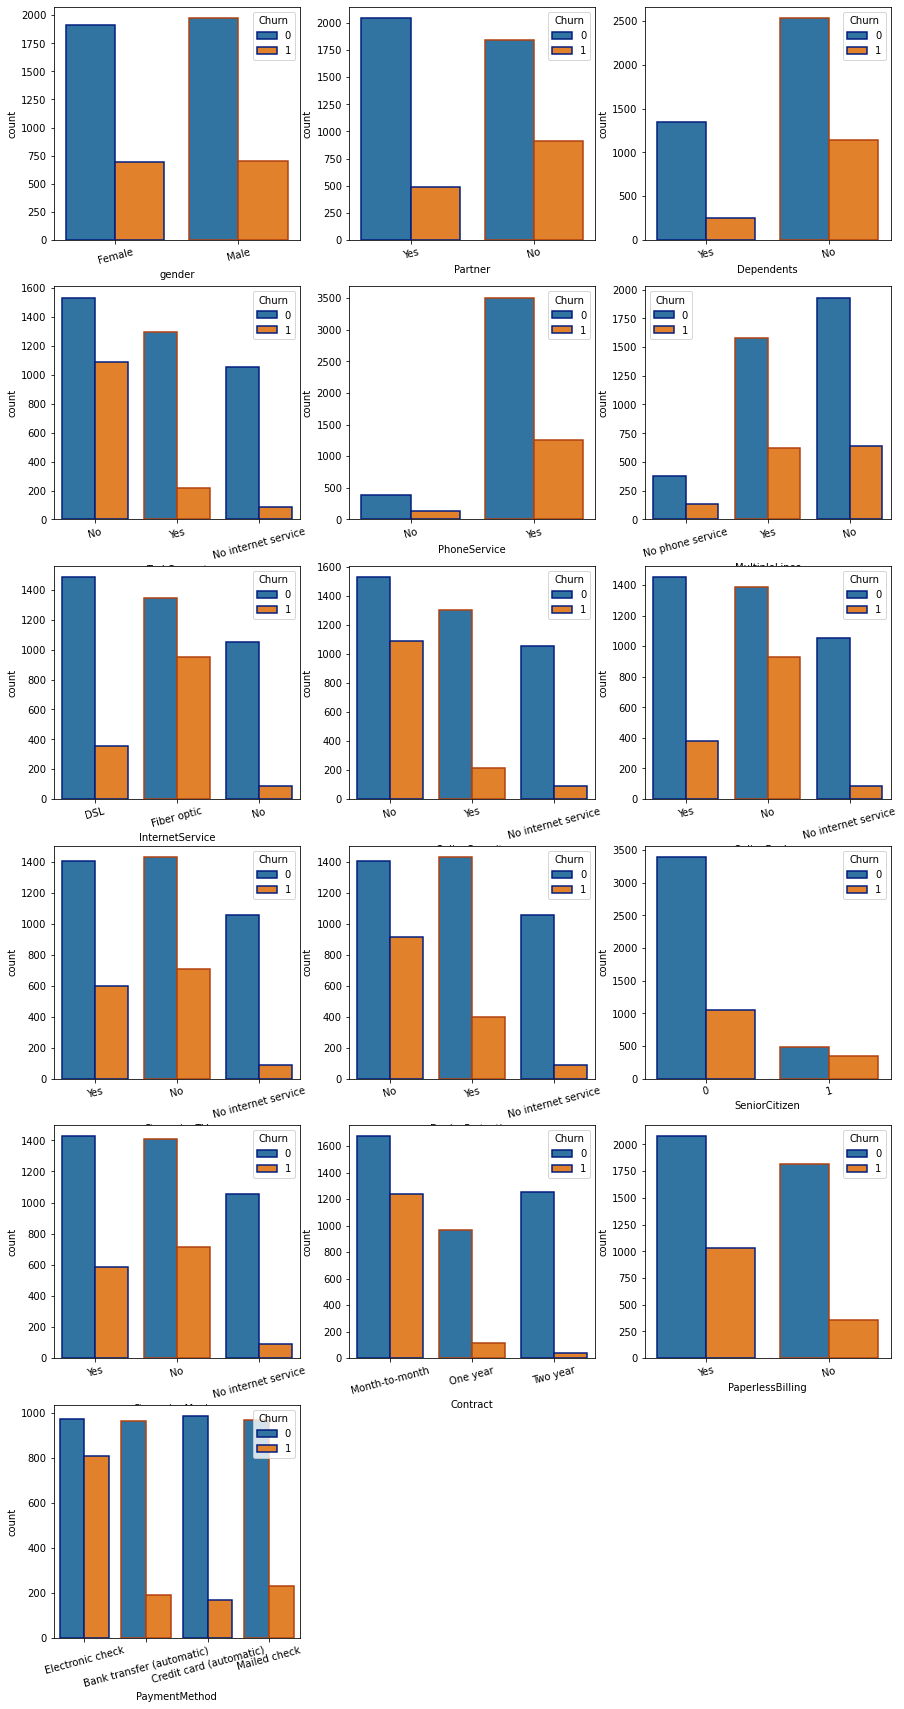

In [21]:
plt.figure(figsize = (15,30))
for i in enumerate(cat_feats):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1], hue = 'Churn', data = train, edgecolor = sns.color_palette("dark", 2), linewidth = 1.5)
    plt.xticks(rotation = 15)

### Looking at numerical variables

In [22]:
train['Churn2']= train['Churn'].astype(str)
train['Churn2'].replace(["0","1"],["No","Yes"], inplace = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B57AB2160>,
      dtype=object)

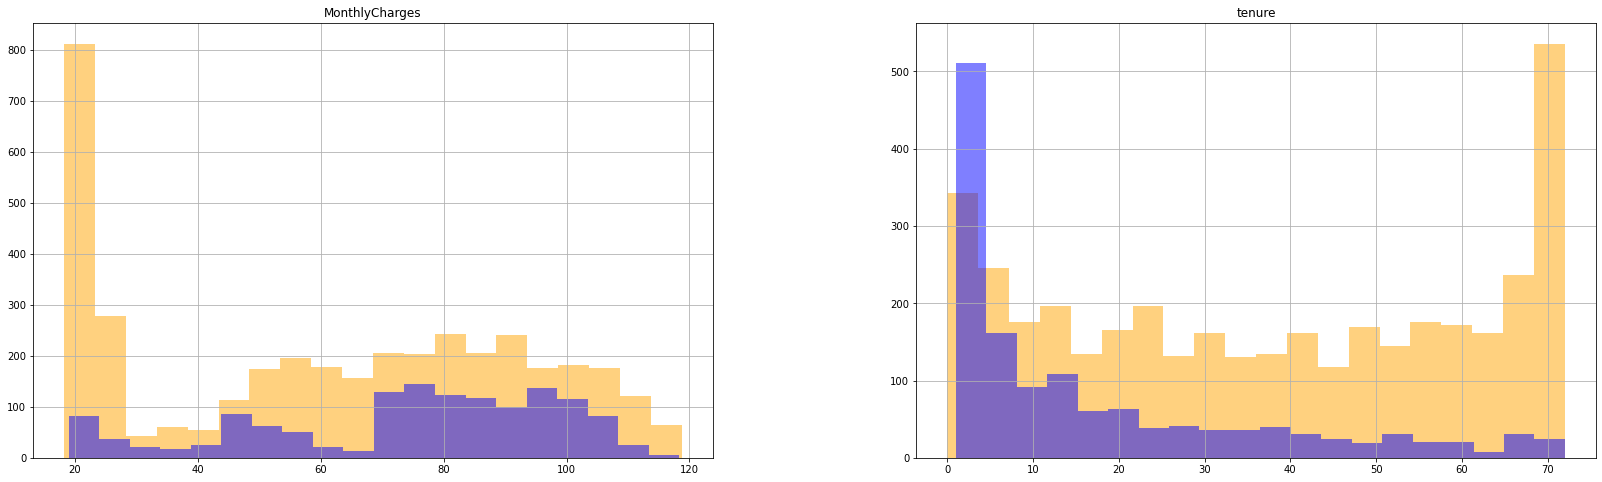

In [23]:

num_feats = ['tenure','MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize = (28,8))

train[train.Churn2 == 'No'][num_feats].hist(bins=20,color = 'orange', alpha = 0.5, ax = ax)
train[train.Churn2 == 'Yes'][num_feats].hist(bins=20,color = 'blue', alpha = 0.5, ax = ax)

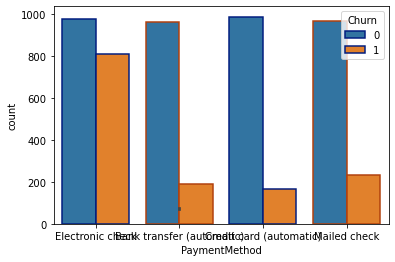

In [50]:
sns.barplot(x='Churn', y = 'MonthlyCharges', data = train)
sns.countplot(i[1], hue = 'Churn', data = train, edgecolor = sns.color_palette("dark", 2), linewidth = 1.5)

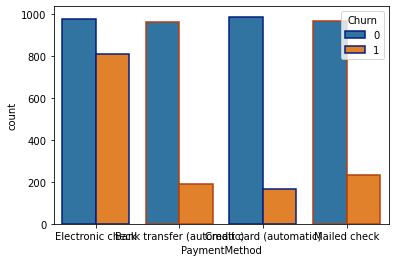

In [54]:
sns.barplot(x='Churn', y = 'tenure', data = train)
sns.countplot(i[1], hue = 'Churn', data = train, edgecolor = sns.color_palette("dark", 2), linewidth = 1.5)

In [46]:
#graph1 = sns.FacetGrid(train,col='TotalCharges', hue ="Churn", height =4, aspect=1)
#graph1.map(plt.scatter,"gender", "SeniorCitizen")

### 'Monthly Charges' shows most of the retained customers have monthly bills between roughly 20 - 30 dollars with the highest churn between 70 - 100 dollars. Secondly, 'tenure' suggests most churn occurs within the first 10 months of service.

In [24]:
#Use the average monthly charge most common services, to create a basic package offered clser to $3o

round(train.MonthlyCharges.mean(),2)

64.5

In [25]:
# Tenure and TotalCharges are two features that drive customer churn as well as SeniorCitizenship
# ... Let's look at age to produce service packages
train.corr()

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016098,0.216524,0.145914
tenure,0.016098,1.000000,0.246406,-0.361497
MonthlyCharges,0.216524,0.246406,1.000000,0.180156
Churn,0.145914,-0.361497,0.180156,1.000000


In [14]:
mon_tot_chrg = (train['Contract'] == 'Month-to-month')  & (train.Churn == 1) & (train.TotalCharges)
train[mon_tot_chrg].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.0
mean,0.258273,13.378531,72.253269,1096.634463,1.0
std,0.437862,15.229199,24.093061,1410.682621,0.0
min,0.000000,1.000000,18.950000,19.100000,1.0
25%,0.000000,2.000000,54.200000,94.575000,1.0
50%,0.000000,7.000000,77.500000,503.600000,1.0
75%,1.000000,19.000000,90.725000,1472.850000,1.0
max,1.000000,71.000000,114.500000,7548.100000,1.0


In [15]:
# Tenure MonthlyCharges, and TotalCharges are features that seem to drive customer churn
# ... Let's look at age to produce new features... looking at correlation
train.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016098,0.216524,0.101319,0.145914
tenure,0.016098,1.000000,0.246406,0.825827,-0.361497
MonthlyCharges,0.216524,0.246406,1.000000,0.647774,0.180156
TotalCharges,0.101319,0.825827,0.647774,1.000000,-0.213306
Churn,0.145914,-0.361497,0.180156,-0.213306,1.000000


In [16]:
train = pd.get_dummies(train, columns = ['gender', 'Partner', 'Dependents', 'TechSupport',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'StreamingTV','DeviceProtection','SeniorCitizen',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first = True)

In [17]:
train.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,TechSupport_Yes,PhoneService_Yes,MultipleLines_Yes,...,StreamingTV_Yes,DeviceProtection_Yes,SeniorCitizen_1,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,40,50.85,2036.55,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,5,81.30,416.30,1,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
2,63,71.50,4576.30,0,1,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
3,36,34.85,1267.20,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,60,74.35,4453.30,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train.shape

(5282, 24)

In [19]:
from sklearn.preprocessing import StandardScaler 

#Performing feature scaling on 'tenure','MonthlyCharges','TotalCharges' to bring them on the same scale 
sc = StandardScaler()
cols_for_scaling = ['tenure','MonthlyCharges','TotalCharges'] 

# Apllying feature scaling on the three columns selected above with fit_transform ()
train[cols_for_scaling] = sc.fit_transform(train[cols_for_scaling])

In [20]:
train.head(2)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,TechSupport_Yes,PhoneService_Yes,MultipleLines_Yes,...,StreamingTV_Yes,DeviceProtection_Yes,SeniorCitizen_1,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.320194,-0.455657,-0.097980,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,-1.105281,0.560476,-0.816328,1,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0


## Test.csv Transformations (the same as with training set)

In [21]:
test.shape

(1761, 20)

In [22]:
# Saving the Customer number for later use
cust_num = test['Customer Number']

custnumbr = pd.DataFrame(cust_num)
custnumbr.columns = ['Customer Number']
custnumbr.head(2)

,Customer Number
0,4709-LKHYG
1,8999-XXGNS


In [23]:
custnumbr.to_csv('custnumbr.csv')

In [24]:
#Removing the Customer Number from the test set.

test = test.drop(['Customer Number'], axis =1)

In [25]:
test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,Yes,29,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,20.00,540.05
1,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),105.75,7629.85


In [26]:
# Converting "No internet service" to "No" for the columns listed below
cols = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'OnlineSecurity']

for i in cols:
    test[i] = test[i].replace({"No internet service": "No"})

test.MultipleLines = test.MultipleLines.replace({'No phone service':"No"})

In [27]:
test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,Yes,29,Yes,No,No,No,No,No,No,No,No,One year,No,Electronic check,20.00,540.05
1,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),105.75,7629.85


In [28]:
test.TotalCharges = pd.to_numeric(test.TotalCharges, errors = 'coerce')

test.TotalCharges.fillna(test['TotalCharges'].mean(),inplace=True)

test.TotalCharges.isnull().sum()

0

In [29]:
# Performing One Hot Encoding via the get_dummies method 

test = pd.get_dummies(test, columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first = True)

In [30]:
test.head(2)

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29,20.00,540.05,0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,72,105.75,7629.85,0,1,1,0,1,1,1,...,1,0,1,1,1,0,1,1,0,0


In [31]:
test.shape

(1761, 23)

In [32]:
from sklearn.preprocessing import StandardScaler 

#Performing feature scaling on 'tenure','MonthlyCharges','TotalCharges' to bring them on the same scale 
sc = StandardScaler()
cols_for_scaling = ['tenure','MonthlyCharges','TotalCharges'] 

# Apllying feature scaling on the three columns selected above with fit_transform ()
test[cols_for_scaling] = sc.fit_transform(test[cols_for_scaling])

In [96]:
test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.165723,-1.496029,-0.794724,0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1.585229,1.321353,2.300152,0,1,1,0,1,1,1,...,1,0,1,1,1,0,1,1,0,0
2,0.526514,0.003837,0.299688,1,0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
3,-0.287883,-1.515742,-0.801054,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-1.305878,-1.308751,-1.019251,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### Feature selection  

In [34]:
X = train.drop(['Churn'], axis = 1)
y = train['Churn']

In [35]:
X.shape

(5282, 23)

#### Extracting important features using ExtraTreesRegressor 

In [36]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [37]:
print(selection.feature_importances_)

[0.18438829 0.10076027 0.12179777 0.04154604 0.03368565 0.0286263
 0.02557236 0.01034494 0.02598301 0.06841235 0.00841601 0.02690815
 0.03012716 0.02208333 0.02733963 0.03025088 0.02318924 0.02781156
 0.02363613 0.03806046 0.01750571 0.06901035 0.0145444 ]


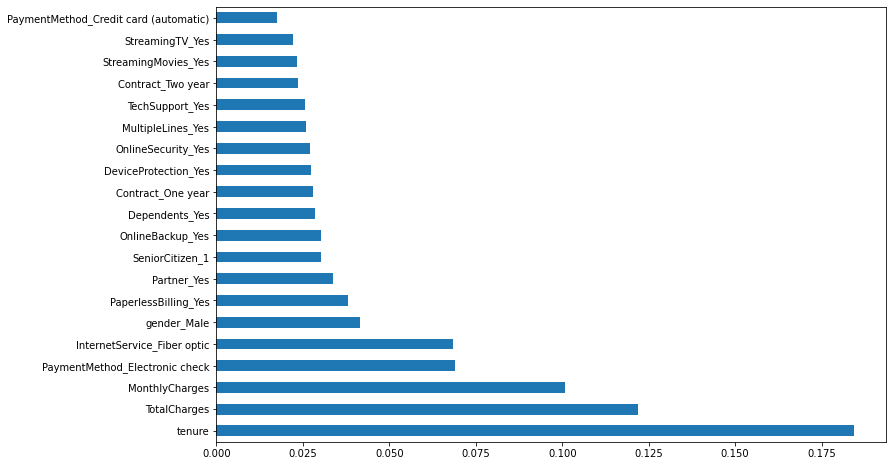

In [38]:
#Plotting a graph that shows the most important features based on correlation to Churn

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Fitting model using LogisticRegression 

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.334,shuffle =True, stratify = y,random_state =None)

In [40]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegressionCV

In [41]:
logmodel = LogisticRegressionCV(Cs = 100, cv =10,penalty= 'l2', solver = 'lbfgs', max_iter= 500)
logmodel.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, cv=10, max_iter=500)

In [42]:
LRpred = logmodel.predict(X_test)

In [43]:
logmodel.score(X_train,y_train)

0.8063690645436451

In [44]:
logmodel.score(X_test,y_test)

0.8084985835694051

In [45]:
preds = test

In [46]:
preds.shape

(1761, 23)

In [47]:
logmodel.predict_proba(preds)

array([[0.96403289, 0.03596711],
       [0.87804602, 0.12195398],
       [0.97802191, 0.02197809],
       ...,
       [0.33799713, 0.66200287],
       [0.6371393 , 0.3628607 ],
       [0.66651715, 0.33348285]])

In [48]:
from sklearn import metrics
print(metrics.accuracy_score(y_test ,LRpred))


0.8084985835694051


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, LRpred)

array([[1183,  116],
       [ 222,  244]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, LRpred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1299
           1       0.68      0.52      0.59       466

    accuracy                           0.81      1765
   macro avg       0.76      0.72      0.73      1765
weighted avg       0.80      0.81      0.80      1765



In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
logit_roc_auc = roc_auc_score(y_test , logmodel.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print (classification_report(y_test, logmodel.predict(X_test)))

Logistic AUC = 0.72
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1299
           1       0.68      0.52      0.59       466

    accuracy                           0.81      1765
   macro avg       0.76      0.72      0.73      1765
weighted avg       0.80      0.81      0.80      1765



In [53]:
from sklearn.metrics import roc_curve , auc
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

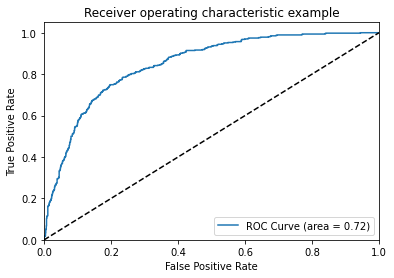

In [54]:
plt.figure()
plt.plot(fpr,tpr, label= 'ROC Curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

In [55]:
LRpred3 = logmodel.predict_proba(preds)
LRpred3

array([[0.96403289, 0.03596711],
       [0.87804602, 0.12195398],
       [0.97802191, 0.02197809],
       ...,
       [0.33799713, 0.66200287],
       [0.6371393 , 0.3628607 ],
       [0.66651715, 0.33348285]])

In [56]:
#LRresults3 = pd.DataFrame(LRpred3)

In [57]:
#LRresults3.to_csv('LRresults3.csv')

In [58]:
#LogisticRegressionCV()

## Tuning the Model via GridSearchCV 

In [59]:
from sklearn.model_selection import GridSearchCV

params = [{'Cs':[1,10,100,1000], 'solver':['liblinear','lbfgs'],
          'tol':[0.0001,0.001,0.01,0.1]}]

grid_search = GridSearchCV(estimator = logmodel,
                           param_grid = params,
                           scoring = 'accuracy',
                             cv = 10, 
                              n_jobs = -1)
grid_search = grid_search.fit(X_train,y_train)

In [60]:
LogisticRegressionCV()

LogisticRegressionCV()

In [61]:
logmod_accuracy = grid_search.best_score_
logmod_accuracy

0.8049444768194769

In [62]:
grid_search.best_params_

{'Cs': 10, 'solver': 'liblinear', 'tol': 0.01}

In [63]:
LRpred = logmodel.predict(X_test)

In [64]:
logmodel.score(X_train,y_train)

0.8063690645436451

In [65]:
logmodel.score(X_test,y_test)

0.8084985835694051

In [66]:
logit_roc_auc = roc_auc_score(y_test , logmodel.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print (classification_report(y_test, logmodel.predict(X_test)))

Logistic AUC = 0.72
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1299
           1       0.68      0.52      0.59       466

    accuracy                           0.81      1765
   macro avg       0.76      0.72      0.73      1765
weighted avg       0.80      0.81      0.80      1765



In [ ]:
#preds.shape

In [67]:
LRaccuracy = round(metrics.accuracy_score(y_test, LRpred)*100, 2)
LRaccuracy

80.85

In [68]:
LRpred2 = logmodel.predict_proba(X_test)
LRpred2

array([[0.59028211, 0.40971789],
       [0.74557462, 0.25442538],
       [0.2442561 , 0.7557439 ],
       ...,
       [0.77967004, 0.22032996],
       [0.8268215 , 0.1731785 ],
       [0.85861969, 0.14138031]])

#### After using GridSearchCV , I was able to improve the model accuracy from  obtainging a lift of 0.55% 

In [ ]:
#LRresults= pd.DataFrame(LRpred2)

In [ ]:
#LRresults.to_csv('LRresults.csv')

In [ ]:
#test.head()

### RandomForest model for comparison

In [69]:
from sklearn.ensemble import RandomForestClassifier  

In [86]:
Rfmodel = RandomForestClassifier( n_estimators = 70, criterion = 'entropy', max_depth = 10, min_samples_split = 6 )

In [87]:
Rfmodel.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=6,
                       n_estimators=70)

In [73]:
from sklearn.model_selection import GridSearchCV

In [83]:
#from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : (10,30,50,70,90,100),
                'criterion'  : ('gini','entropy') ,
                'max_depth'  : (3,5,7,9,10) ,
                 'max_features' : ('auto','sqrt'),
                 'min_samples_split' : (2,4,6)}

In [84]:
Rf_grid = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score = False), param_grid = parameters, cv = 3, verbose = True)

In [77]:
Rf_grid_mod = Rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  2.1min finished


In [78]:
Rf_grid_mod.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=6,
                       n_estimators=70, n_jobs=-1)

In [90]:
Rf_grid_mod.best_score_

0.8060858314736093

### Most important Visuals - combining features to see how they interact to impact Churn. 

Text(0.5, 1.0, 'Monthly Charges by Churn')

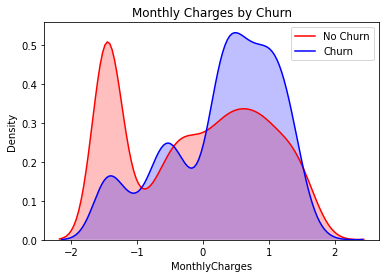

In [93]:
monthlycharges = sns.kdeplot(train.MonthlyCharges[(train['Churn']==0) ],
                            color = "Red", shade = True)
monthlycharges = sns.kdeplot(train.MonthlyCharges[(train['Churn']==1)],
                            ax=monthlycharges, color = "Blue", shade = True)
monthlycharges.legend(['No Churn','Churn'],loc = 'upper right')
monthlycharges.set_ylabel('Density')
monthlycharges.set_xlabel('MonthlyCharges')
monthlycharges.set_title('Monthly Charges by Churn') 

Text(0.5, 1.0, 'Total Charges by Churn')

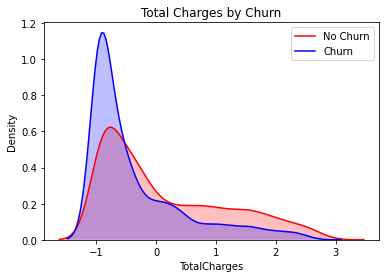

In [98]:
totalcharges = sns.kdeplot(train.TotalCharges[(train['Churn']==0) ],
                            color = "Red", shade = True)
totalcharges = sns.kdeplot(train.TotalCharges[(train['Churn']==1)],
                            ax=totalcharges, color = "Blue", shade = True)
totalcharges.legend(['No Churn','Churn'],loc = 'upper right')
totalcharges.set_ylabel('Density')
totalcharges.set_xlabel('TotalCharges')
totalcharges.set_title('Total Charges by Churn') 

### Insight : Churn is high when monthly charges are high

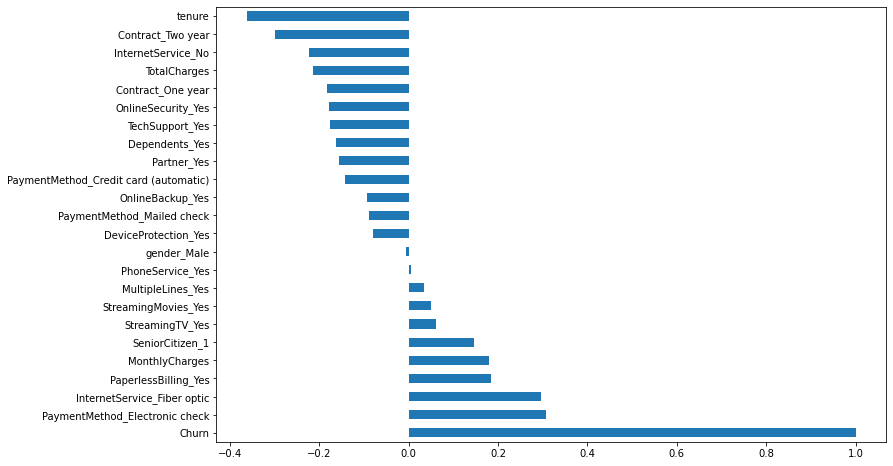

In [97]:
plt.figure(figsize = (12,8))
train.corr()['Churn'].sort_values(ascending = False).plot(kind = 'barh')

In [99]:
train.head(2)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,TechSupport_Yes,PhoneService_Yes,MultipleLines_Yes,...,StreamingTV_Yes,DeviceProtection_Yes,SeniorCitizen_1,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.320194,-0.455657,-0.097980,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,-1.105281,0.560476,-0.816328,1,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
